# Tensor Import

In [2]:
import torch

# 1. Tensor Basics

In [3]:
x = torch.tensor(5)
print(x)

x = torch.tensor((1,2))
print(x)

x = torch.empty(2,3)
print(x)

tensor(5)
tensor([1, 2])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [4]:
# check size
print("x.size(): ", x.size())
print("x.shape: ", x.shape)

x.size():  torch.Size([2, 3])
x.shape:  torch.Size([2, 3])


In [5]:
# check data type
print(x.dtype)

torch.float32


In [6]:
# requires_grad argument
# This will tell pytorch that it will need to calculate the gradients for this tensor
# later in your optimization steps
# e.g. this is a variable in your model that you want to optimize
x = torch.tensor([5.5, 3], requires_grad=True)
print(x)

tensor([5.5000, 3.0000], requires_grad=True)


## Operations with Tensors

In [7]:
# Operations
x = torch.ones(2, 3)
y = torch.rand(2, 3)

# addition
z = x + y

# subtraction
z = x - y

# multiplication
z = x * y

# division
z = x / y

print(x)
print(y)
print(z)



tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0.2292, 0.2657, 0.0598],
        [0.3025, 0.6910, 0.4135]])
tensor([[ 4.3627,  3.7635, 16.7098],
        [ 3.3061,  1.4473,  2.4183]])


In [8]:
# Slicing
x = torch.rand(3, 3)
print(x)

print("x[:, 0]", x[:, 0])
print("x[0, :]", x[0, :])
print("x[0, 0]", x[0, 0])

# Get the actual value if only 1 element in your tensor
print("x[0, 0].item()", x[0, 0].item())

tensor([[0.3998, 0.8868, 0.9747],
        [0.6733, 0.1902, 0.8151],
        [0.3930, 0.3556, 0.2902]])
x[:, 0] tensor([0.3998, 0.6733, 0.3930])
x[0, :] tensor([0.3998, 0.8868, 0.9747])
x[0, 0] tensor(0.3998)
x[0, 0].item() 0.39976930618286133


In [9]:
# Reshape with torch.view()
x = torch.rand(4, 4)
y = x.view(16)
z = x.view(-1, 8) # if -1 pytorch will automatically determine the necessary size

print(x)
print(y)
print(z)

tensor([[0.1184, 0.6815, 0.4150, 0.5454],
        [0.0218, 0.6924, 0.2166, 0.6636],
        [0.1374, 0.8166, 0.2508, 0.6746],
        [0.4214, 0.2200, 0.4698, 0.1986]])
tensor([0.1184, 0.6815, 0.4150, 0.5454, 0.0218, 0.6924, 0.2166, 0.6636, 0.1374,
        0.8166, 0.2508, 0.6746, 0.4214, 0.2200, 0.4698, 0.1986])
tensor([[0.1184, 0.6815, 0.4150, 0.5454, 0.0218, 0.6924, 0.2166, 0.6636],
        [0.1374, 0.8166, 0.2508, 0.6746, 0.4214, 0.2200, 0.4698, 0.1986]])


## NumPy

Converting a Torch Tensor to a NumPy array and vice versa

In [10]:
a = torch.ones(5)
print(a)

b = a.numpy()
print(b)
print(type(b))

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>


In [11]:
# Careful: If the Tensor is on the CPU (not the GPU),
# both objects will share the same memory location, so changing one
# will also change the other
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [12]:
# numpy to torch with .from_numpy(x), or torch.tensor() to copy it
import numpy as np

a = np.ones(5)
b = torch.from_numpy(a) # they share the same memory location
c = torch.tensor(a)
print(a)
print(b)
print(c)

# again be careful when modifying
a += 1
print(a)
print(b)
print(c)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


## GPU Support

By default all tensors are created on the CPU. But we can also move them to the GPU (if it's available ), or create them directly on the GPU.

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

x = torch.rand(2, 2).to(device) # move tensors to GPU device if available

# it is a small optimizations
x = torch.rand(2, 2, device=device)  # or directy create them on GPU if available

# 2. Autograd

The autograd package provides automatic differentiation for all operations on Tensors. Generally speaking, torch.autograd is an engine for computing the vector-Jacobian product. It computes partial derivates while applying the chain rule.

In [14]:
# requires_grad = True -> tracks all operations on the tensor
x = torch.rand(3, requires_grad=True)
y = x + 2

# y was created as a result of an operation, so it has a grad_fn attribute.
# grad_fn: references a Function that has created the Tensor
print(x) # created by the user -> grad_fn is None
print(y)
print(y.grad_fn)

tensor([0.4604, 0.2417, 0.0444], requires_grad=True)
tensor([2.4604, 2.2417, 2.0444], grad_fn=<AddBackward0>)


In [15]:
# more operations on y
z = y * y * 3
print(z)

z = z.mean()
print(z)

tensor([18.1611, 15.0757, 12.5390], grad_fn=<MulBackward0>)
tensor(15.2586, grad_fn=<MeanBackward0>)


In [16]:
# Compute the gradients with backpropagation
# When we finish our computation we can call .backward() and have all the gradients computed automatically.
# The gradient for this tensor will be accumulated into .grad attribute.
# It is the partial derivate of the function w.r.t. the tensor

z.backward()
print(x.grad) # dz/dx

# !!! Careful!!! backward() accumulates the gradient for this tensor into .grad attribute.
# !!! We need to be careful during optimization !!! optimizer.zero_grad()

tensor([4.9209, 4.4834, 4.0889])


## Stop a tensor from tracking history:

For example during the training loop when we want to update our weights, or after training during evaluation. These operations should not be part of the gradient computation. To prevent this, we can use:

* `x.requires_grad_(False)`
* ``x.detach()`
* wrap in `with torch.no_grad():`

In [17]:
# .requires_grad_(...) changes an existing flag in-place.
a = torch.rand(2, 2)
b = (a * a).sum()
print(a.requires_grad)
print(b.grad_fn)

a.requires_grad_(True)
b = (a * a).sum()
print(a.requires_grad)
print(b.grad_fn)

False
None
True


In [18]:
# .detach(): get a new Tensor with the same content but no gradient computation:
a = torch.rand(2, 2, requires_grad=True)
b = a.detach()

print(a.requires_grad)
print(b.requires_grad)

True
False


In [19]:
# wrap in 'with torch.no_grad():'
a = torch.rand(2, 2, requires_grad=True)
print(a.requires_grad)

with torch.no_grad():
    b = a ** 2
    print(b.requires_grad)

True
False


## Gradient Descent Autograd
Linear Regression example:

$f(x) = w * x + b$

here : `f(x) = 2 * x`

In [20]:
# Linear regression
# f = w * x  + b
# here : f = 2 * x

x = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8], dtype=torch.float32)
y = torch.tensor([2, 4, 6, 8, 10, 12, 14, 16], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model output
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

In [21]:
X_test = 12.0

# Training
learning_rate = 0.01
epochs = 100

print(f'Prediction before training: f({X_test}) = {forward(X_test).item():.3f}')

for epoch in range(epochs):
    # predict = forward pass
    y_pred = forward(x)

    # loss
    l = loss(y, y_pred)

    # calculate gradients = backward pass dl/dw
    l.backward()

    # update weights
    #w.data = w.data - learning_rate * w.grad
    with torch.no_grad():
      w -= learning_rate * w.grad
    
    # zero the gradients after updating
    w.grad.zero_()

    if (epoch + 1) % 10 == 0:
        print(f'epoch {epoch+1}: w = {w.item():.3f}, loss = {l.item():.3f}')

print(f'Prediction after training: f({X_test}) = {forward(X_test).item():.3f}')

Prediction before training: f(12.0) = 0.000
epoch 10: w = 1.998, loss = 0.000
epoch 20: w = 2.000, loss = 0.000
epoch 30: w = 2.000, loss = 0.000
epoch 40: w = 2.000, loss = 0.000
epoch 50: w = 2.000, loss = 0.000
epoch 60: w = 2.000, loss = 0.000
epoch 70: w = 2.000, loss = 0.000
epoch 80: w = 2.000, loss = 0.000
epoch 90: w = 2.000, loss = 0.000
epoch 100: w = 2.000, loss = 0.000
Prediction after training: f(12.0) = 24.000


# 3. Model, Loss & Optimizer

A typical PyTorch pipeline looks like this:

1. Design model (input, output, forward pass with different layers)
2. Construct loss and optimizer
3. Training loop:
  - Forward = compute prediction and loss
  - Backward = compute gradients
  - Update weights

In [22]:
import torch
import torch.nn as nn

# Linear regression
# f = w * x  + b
# here : f = 2 * x

# 0) Training samples, SHAPE is important
x = torch.tensor([[1], [2], [3], [4], [5], [6], [7], [8]], dtype=torch.float32)
y = torch.tensor([[2], [4], [6], [8], [10], [12], [14], [16]], dtype=torch.float32)

n_samples, n_features = x.shape
print(f"n_samples = {n_samples}, n_features = {n_features}")

# 0) Create a TEST sample
X_test = torch.tensor([5], dtype=torch.float32)

n_samples = 8, n_features = 1


In [ ]:
# 1) Design Model, the model has to implement the forward pass!
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        # define different layers
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

input_size = output_size = n_features

model = LinearRegression(input_size, output_size)

print(f'Prediction before training: f({X_test.item()}) = {model(X_test).item():.3f}')

# 2) Define loss and optimizer
learning_rate = 0.01
epochs = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Training loop
for epoch in range(epochs):
    # predict = forward pass with our model
    y_pred = model(x)

    # loss
    l = loss(y_pred, y)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    optimizer.step()

    # zero the gradients after updating
    optimizer.zero_grad()

    if (epoch + 1) % 10 == 0:
        w, b = model.parameters() # unpack parameters
        print(f'epoch {epoch + 1}: w = {w[0][0].item():.3f}, loss = {l.item():.3f}')

print(f'Prediction after training: f({X_test.item()}) = {model(X_test).item():.3f}')

Prediction before training: f(5.0) = 4.156
epoch 10: w = 1.871, loss = 0.109
epoch 20: w = 1.876, loss = 0.100
epoch 30: w = 1.881, loss = 0.093
epoch 40: w = 1.886, loss = 0.085
epoch 50: w = 1.890, loss = 0.079
epoch 60: w = 1.895, loss = 0.073
epoch 70: w = 1.899, loss = 0.067
epoch 80: w = 1.903, loss = 0.062
epoch 90: w = 1.907, loss = 0.057
epoch 100: w = 1.910, loss = 0.053
Prediction after training: f(5.0) = 10.056


# 4. Neural Network
GPU, Datasets, DataLoader, Transforms, Neural Network, Training & Evaluation

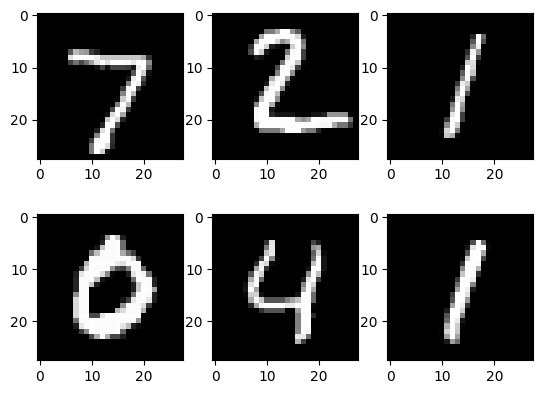

In [7]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
epochs = 3
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)

examples = iter(test_loader)
example_data, example_targets = next(examples)

for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()

In [8]:
# Fully connected neural network with one hidden layer
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer_1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.layer_2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        output = self.layer_1(x)
        output = self.relu(output)
        output = self.layer_2(output)
        # no activation and no softmax at the end
        return output

model = NeuralNetwork(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
cross_entropy_loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
n_total_steps = len(train_loader)
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)

        # Forward pass and loss calculation
        outputs = model(images)
        loss = cross_entropy_loss(outputs, labels)

        # Backward and optimize
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch + 1}/{epochs}], Step [{i + 1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/3], Step [100/600], Loss: 0.3171
Epoch [1/3], Step [200/600], Loss: 0.2718
Epoch [1/3], Step [300/600], Loss: 0.1216
Epoch [1/3], Step [400/600], Loss: 0.1852
Epoch [1/3], Step [500/600], Loss: 0.1994
Epoch [1/3], Step [600/600], Loss: 0.1877
Epoch [2/3], Step [100/600], Loss: 0.2133
Epoch [2/3], Step [200/600], Loss: 0.0790
Epoch [2/3], Step [300/600], Loss: 0.0896
Epoch [2/3], Step [400/600], Loss: 0.1449
Epoch [2/3], Step [500/600], Loss: 0.0683
Epoch [2/3], Step [600/600], Loss: 0.0469
Epoch [3/3], Step [100/600], Loss: 0.1038
Epoch [3/3], Step [200/600], Loss: 0.1333
Epoch [3/3], Step [300/600], Loss: 0.0657
Epoch [3/3], Step [400/600], Loss: 0.1622
Epoch [3/3], Step [500/600], Loss: 0.0414
Epoch [3/3], Step [600/600], Loss: 0.0327


In [1]:
# Test the model: we don't need to compute gradients
with torch.no_grad():
    n_correct = 0
    n_samples = len(test_loader.dataset)

    for images, labels in test_loader: 
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)

        outputs = model(images)

        # max returns (output_value ,index)
        _, predicted = torch.max(outputs, 1)
        n_correct += (predicted == labels).sum().item()

    accuracy = n_correct / n_samples
    print(f'Accuracy of the network on the {n_samples} test images: {100 * accuracy} %')

NameError: name 'torch' is not defined

# 5. Convolutional Neural Network

This section covers:

- Convolutional Layers
- MaxPooling
- Save/Load model

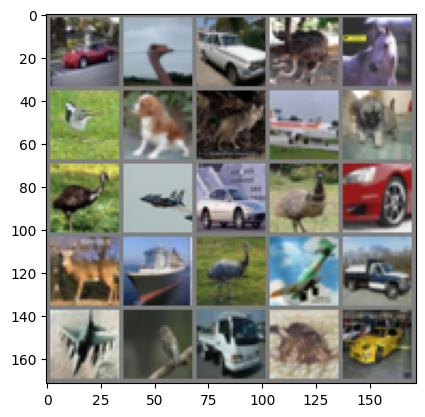

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyper-parameters
epochs = 10
batch_size = 32
learning_rate = 0.001

# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imgshow(imgs):
    imgs = imgs / 2 + 0.5   # unnormalize
    npimgs = imgs.numpy()
    plt.imshow(np.transpose(npimgs, (1, 2, 0)))
    plt.show()

# one batch of random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
img_grid = torchvision.utils.make_grid(images[0:25], nrow=5)
imgshow(img_grid)

In [6]:
class ConvNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.conv3 = nn.Conv2d(64, 64, 3)
        self.linear1 = nn.Linear(64 * 4 * 4, 64)
        self.linear2 = nn.Linear(64, 10)

    def forward(self, x):
        # N, 3, 32, 32
        x = F.relu(self.conv1(x))   # -> N, 32, 30, 30
        x = self.pool(x)            # -> N, 32, 15, 15
        x = F.relu(self.conv2(x))   # -> N, 64, 13, 13
        x = self.pool(x)            # -> N, 64, 6, 6
        x = F.relu(self.conv3(x))   # -> N, 64, 4, 4
        x = torch.flatten(x, 1)     # -> N, 1024
        x = F.relu(self.linear1(x)) # -> N, 64
        x = self.linear2(x)         # -> N, 10
        return x

model = ConvNeuralNetwork().to(device)

# Loss and optimizer
cross_entropy_loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
print('Training Started')
n_total_steps = len(train_loader)
for epoch in range(epochs):

    running_loss = 0.0

    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = cross_entropy_loss(outputs, labels)

        # Backward and optimize
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        running_loss += loss.item()

    print(f'[{epoch + 1}] loss: {running_loss / n_total_steps:.3f}')

print('Training Finished')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

Training Started
[1] loss: 1.464
[2] loss: 1.082
[3] loss: 0.912
[4] loss: 0.816
[5] loss: 0.745
[6] loss: 0.689
[7] loss: 0.636
[8] loss: 0.592
[9] loss: 0.552
[10] loss: 0.517
Training Finished
